## <center> Python Geospatial Data Analysis

### Import Libraries

In [6]:
# Standard library imports
import math

# Third-party library imports
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, HeatMap


### Import Data

In [8]:
# Load the data from the provided URL into a pandas DataFrame
df = pd.read_csv('https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/e86f8e38-a23c-4c1a-8455-c8f94210a8f1/download/tmpf_uzkqpk.csv')

# Display the first 6 rows of the DataFrame to get a quick overview of the data
df.head(6)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0      I192074715          2629         Harassment   
1      I192068538          1107              Fraud   
2      I192005657          2610              Other   
3      I192075335          3208      Property Lost   
4      I192013179           619            Larceny   
5      I182072846           617            Larceny   

           OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                   HARASSMENT       B2            278      NaN   
1        FRAUD - IMPERSONATION      D14            794      NaN   
2                  TRESPASSING      C11            396      NaN   
3           PROPERTY - MISSING       D4            132      NaN   
4           LARCENY ALL OTHERS      C11            360      NaN   
5  LARCENY THEFT FROM BUILDING      C11            353      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-01-01 00:00:00  2018      1      Monday     0    Part Two   
1  2018-01-01 00:00:00  2018      1      Monday     0    Part Two   
2  2018-01-01 00:00:00  2018      1      Monday     0    Part Two   
3  2018-01-01 00:00:00  2018      1      Monday     0  Part Three   
4  2018-01-01 00:00:00  2018      1      Monday     0    Part One   
5  2018-01-01 00:00:00  2018      1      Monday     0    Part One   

             STREET        Lat       Long                     Location  
0      HARRISON AVE  42.331538 -71.080157  (42.33153805, -71.08015661)  
1     GLENVILLE AVE  42.349780 -71.134230  (42.34977988, -71.13423049)  
2      MELBOURNE ST  42.291093 -71.065945  (42.29109287, -71.06594539)  
3  COMMONWEALTH AVE  42.353522 -71.072838  (42.35352153, -71.07283786)  
4   CENTERVALE PARK  42.296323 -71.063569  (42.29632282, -71.06356881)  
5       FREEPORT ST  42.301499 -71.050712  (42.30149875, -71.05071215)

### Generate Base Map

A BASE MAP OF BOSTON AREA

In [10]:
# Define the latitude and longitude coordinates for Boston
boston = (42.358443, -71.05977)

# Create a folium map centered around Boston
m = folium.Map(location=boston, title='Stamen terrain', zoom_start=12)

# Display the map
m

### Mark Crime Scenes

A MAP SHOWING DISTRICTS WITH THE HIGHEST CRIME RATES

In [20]:
mc= MarkerCluster()
for idx,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'],row['Long']]))
m.add_child(mc)

### View Districts with Highest Crime Rates

In [22]:
crime=df.groupby(['DISTRICT','STREET','REPORTING_AREA','Lat','Long']).sum().reset_index()

In [23]:
crime.update(crime['DISTRICT'].map('District:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Reports:{}'.format))


 HEATMAP SHOWING CRIME RATE

In [33]:
m2=folium.Map(location=boston,tiles='Stamentoner',zoom_start=12)
HeatMap(data=crime[['Lat','Long']],radius=15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location=[point.Lat,point.Long],
                       radius=5,
                       weight=2,
                       popup=[point.DISTRICT,point.REPORTING_AREA],
                       fill_color='#000000').add_to(m2)
crime.apply(plotDot,axis=1)
m2.fit_bounds(m2.get_bounds())
m2

### Medical Assistance Analysis

A MAP SHOWING REQUIRED MEDICAL ASSISTANCE

In [37]:
med=df.loc[df.OFFENSE_CODE_GROUP== 'Medical Assistance'][['Lat','Long']]
med.Lat.fillna(0,inplace=True)
med.Long.fillna(0,inplace=True)
m6=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=med,radius=16).add_to(m6)
m6

C:\Users\Lenovo G500\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Lenovo G500\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Crimes Commited

A BAR GRAPH SHOWING COMMITTED CRIMES

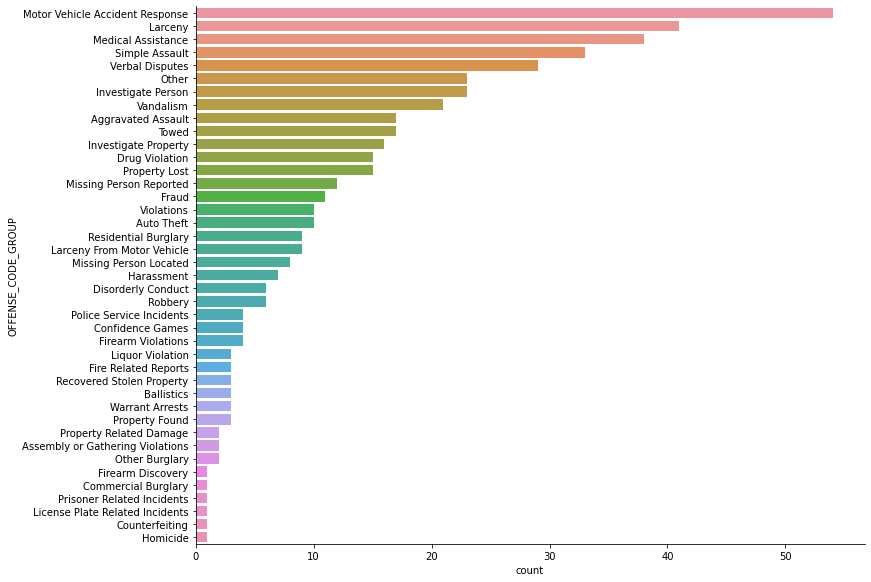

In [46]:
sns.catplot(y='OFFENSE_CODE_GROUP',
kind='count',
height=8,
aspect=1.5,
order=df.OFFENSE_CODE_GROUP.value_counts().index,
data=df)

### Motor Vehicle Accident Response

OPENSTREETMAP SHOWING POSSIBLE CAUSES OF MOTOR VEHICLE ACCIDENTS

In [47]:
mv=df.loc[df.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response'][['Lat','Long']]
mv.fillna(0,inplace=True)
mv.Lat.fillna(0,inplace=True)
mv.Long.fillna(0,inplace=True)
m4=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=mv,radius=16).add_to(m4)
m4

### Larceny

OPENSTREETMAP SHOWING POSSIBLE CAUSES OF LARCENCY

In [48]:
lar=df.loc[df.OFFENSE_CODE_GROUP=='Larcency'][['Lat','Long']]
lar.Lat.fillna(0,inplace=True)
lar.Long.fillna(0,inplace=True)
m5=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=lar,radius=16).add_to(m5)
m5